https://mp.weixin.qq.com/s?__biz=MzUzODYwMDAzNA==&mid=2247484320&idx=1&sn=c4b2978c842e7e82eae00c800d099671&chksm=fad474adcda3fdbbf2c24b7a4d854f5b76c04c334c911dcc301930a2c53d0578f6a54570f790&scene=21#wechat_redirect

In [8]:

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
# %matplotlib inline

# 检查Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

In [116]:
import pandas as pd
lianjia_df = pd.read_excel(r'A:\PythonProject\北京二手房房价分析与预测\链家.xlsx')
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [44]:
print(lianjia_df.head(5))

   Direction District Elevator  Floor     Garden            Id Layout   Price  \
3         南北       东单      无电梯    6.0      东华门大街  1.011027e+11   2室1厅   705.0   
5         南西      崇文门      有电梯   16.0      新世界中心  1.011027e+11   3室1厅  1400.0   
9          南      陶然亭      有电梯   19.0     中海紫御公馆  1.011026e+11   2室2厅   998.0   
11        南北      广渠门      有电梯   18.0     幸福家园二期  1.011024e+11   2室1厅  1180.0   
13         南      西罗园      无电梯    6.0  西革新里110号院  1.011026e+11   1室1厅   319.0   

   Region Renovation   Size    Year  
3      东城         精装   60.0  1988.0  
5      东城         其他  210.0  1996.0  
9      东城         精装   90.0  2010.0  
11     东城         其他  111.0  2003.0  
13     东城         其他   42.0  1992.0  


In [117]:
lianjia_df = lianjia_df.dropna()

In [45]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15440 entries, 3 to 47333
Data columns (total 12 columns):
Direction     15440 non-null object
District      15440 non-null object
Elevator      15440 non-null object
Floor         15440 non-null float64
Garden        15440 non-null object
Id            15440 non-null float64
Layout        15440 non-null object
Price         15440 non-null float64
Region        15440 non-null object
Renovation    15440 non-null object
Size          15440 non-null float64
Year          15440 non-null float64
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


In [118]:
# 添加新特征房屋均价
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)

# 重新审视数据集
df.head(n=2)

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
3,东城,东单,东华门大街,2室1厅,6.0,1988.0,60.0,无电梯,南北,精装,11.750000,705.0
5,东城,崇文门,新世界中心,3室1厅,16.0,1996.0,210.0,有电梯,南西,其他,6.666667,1400.0


In [78]:
print(df.head(2))

  Region District Garden Layout  Floor    Year   Size Elevator Direction  \
3     东城       东单  东华门大街   2室1厅    6.0  1988.0   60.0      无电梯        南北   
5     东城      崇文门  新世界中心   3室1厅   16.0  1996.0  210.0      有电梯        南西   

  Renovation   PerPrice   Price  
3         精装  11.750000   705.0  
5         其他   6.666667  1400.0  


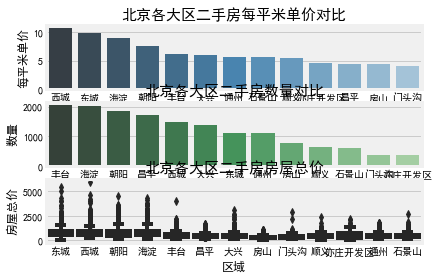

In [77]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().\
    sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().\
    sort_values(ascending=False).to_frame().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, [ax1,ax2,ax3] = plt.subplots(3,1)
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price',palette="Reds_d", data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

In [53]:
df_house_count

,Region,Price
0,丰台,2055
1,海淀,2009
2,朝阳,1852
3,昌平,1723
4,西城,1469
5,大兴,1379
6,东城,1107
7,通州,1095
8,房山,783
9,顺义,642


In [54]:
df_house_mean

,Region,PerPrice
0,西城,10.665906
1,东城,9.843156
2,海淀,8.969735
3,朝阳,7.524314
4,丰台,6.247067
5,大兴,5.985061
6,通州,5.623072
7,石景山,5.555820
8,顺义,5.510787
9,亦庄开发区,4.662084


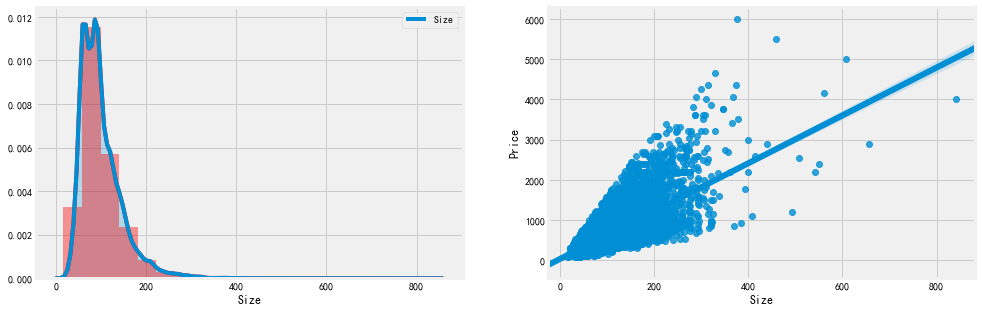

In [86]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 建房时间的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [81]:
print(df.loc[df['Size']< 10])

      Region District   Garden Layout  Floor    Year  Size Elevator Direction  \
2337      房山       长阳     世茂维拉   叠拼别墅    5.0  2015.0   5.0       毛坯  240.97平米   
2917      房山       长阳     世茂维拉   叠拼别墅    5.0  2015.0   5.0       毛坯  242.78平米   
3595      房山       长阳     世茂维拉   叠拼别墅    5.0  2015.0   5.0       精装  242.96平米   
4537      顺义     顺义其它    龙湖好望山   叠拼别墅    4.0  2014.0   4.0       精装  295.88平米   
4549      顺义     顺义其它     鹭峯国际   叠拼别墅    4.0  2014.0   5.0       精装  295.01平米   
4553      顺义     顺义其它    龙湖好望山   叠拼别墅    3.0  2014.0   4.0       毛坯  292.31平米   
4865      顺义     顺义其它    龙湖好望山   叠拼别墅    5.0  2013.0   6.0       精装  294.42平米   
8157      大兴      西红门    鸿坤林语墅   叠拼别墅    3.0  2015.0   4.0       精装   427.5平米   
8159      大兴      西红门    鸿坤林语墅   叠拼别墅    4.0  2015.0   4.0       精装   361.8平米   
9523      大兴      西红门    鸿坤林语墅   叠拼别墅    3.0  2015.0   5.0       精装  386.83平米   
15067     昌平      回龙观   龙城花园N区   叠拼别墅    4.0  1997.0   2.0       简装  107.93平米   
17531     通州     通州其它     旭辉

In [83]:
print(df.loc[df['Size']>1000])

      Region District   Garden Layout  Floor    Year    Size Elevator  \
17509     通州     通州其它  新华联科技大厦  1房间0卫    8.0  2009.0  1019.0      有电梯   

      Direction Renovation  PerPrice   Price  
17509         南         简装  1.668302  1700.0  


In [85]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

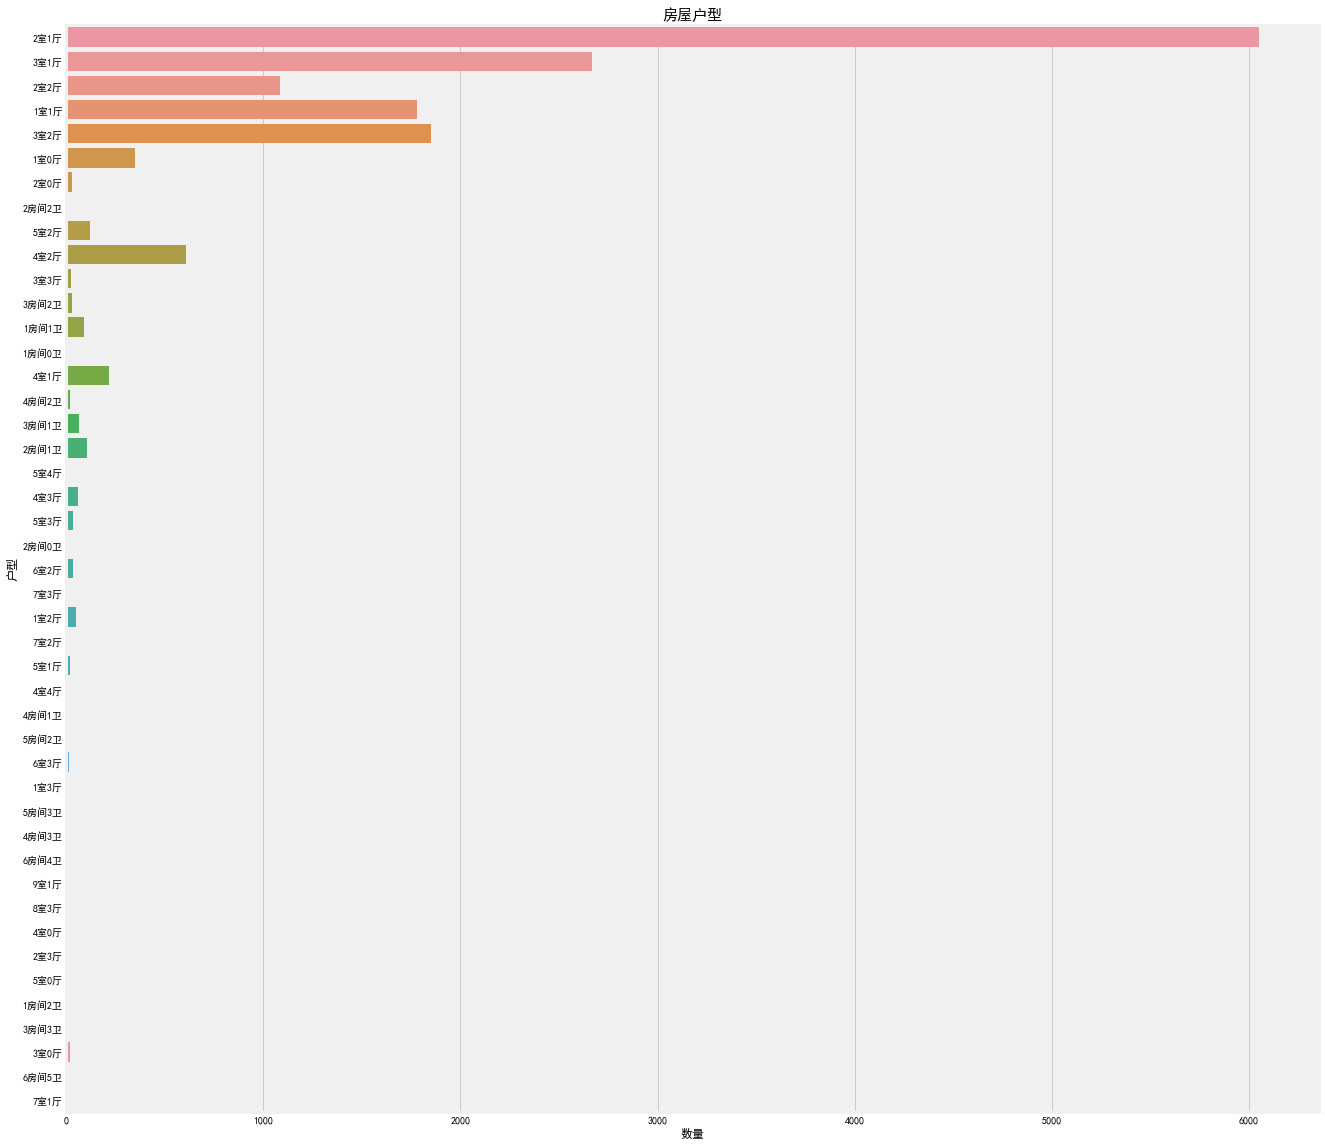

In [87]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [91]:
df['Renovation'].value_counts()

精装    7262
简装    5689
其他    2119
毛坯     349
Name: Renovation, dtype: int64

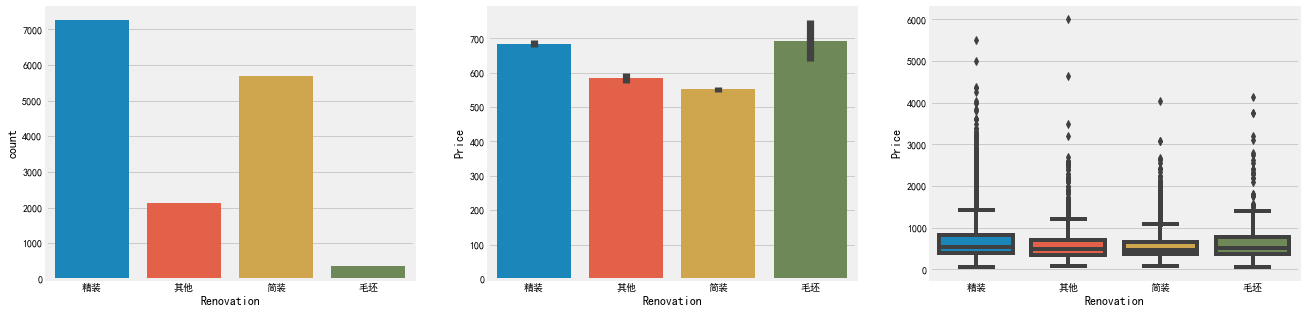

In [92]:
# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

In [93]:
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：0


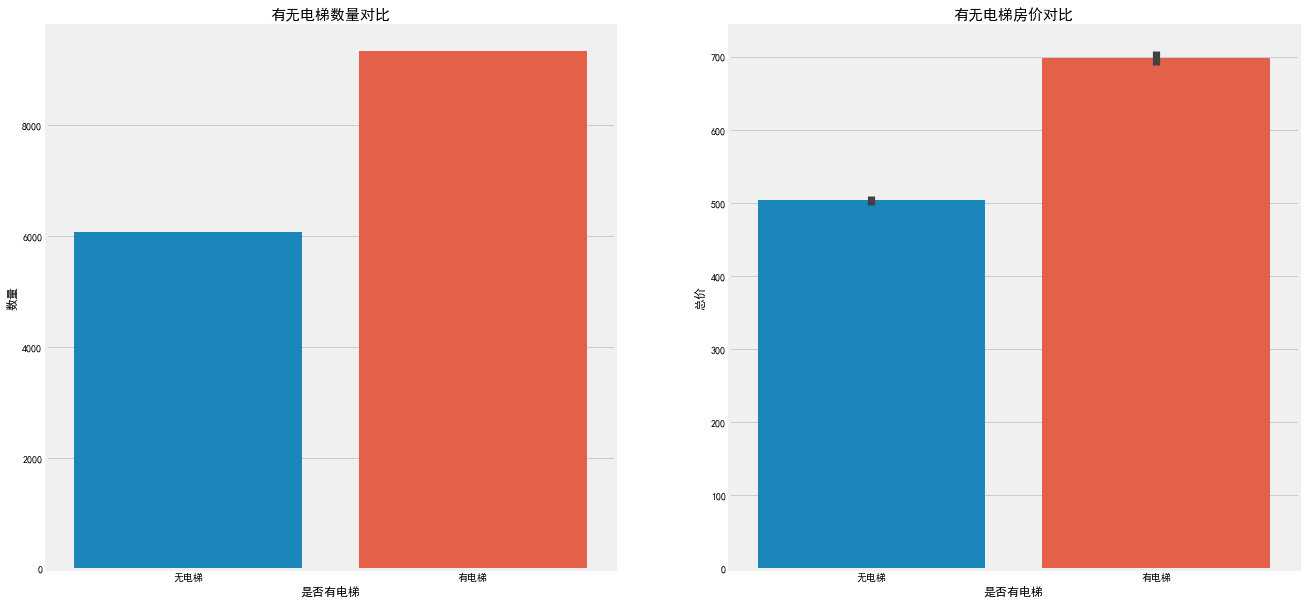

In [94]:
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']

# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

In [99]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

In [98]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

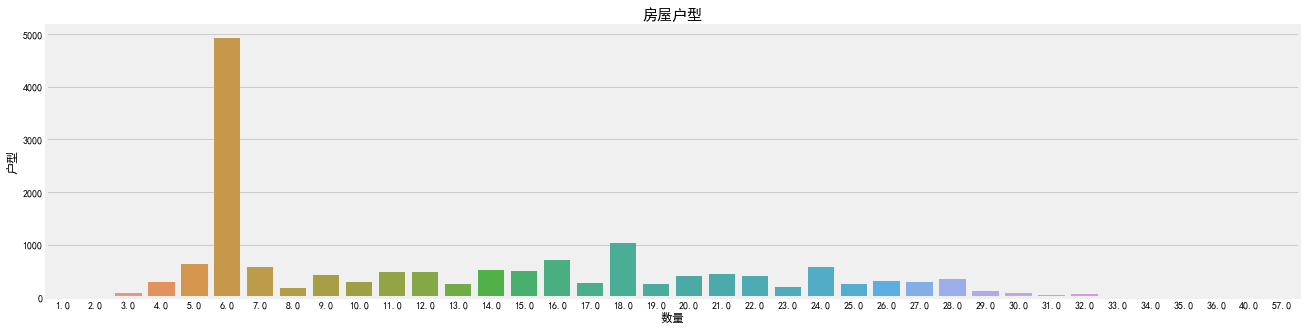

In [100]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

https://mp.weixin.qq.com/s/6aCI9PABHZccThrGqak6Lg

In [119]:
 """
 特征工程
 """
 # 移除结构类型异常值和房屋大小异常值
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]
 
# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']
 
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'
# 只考虑“室”和“厅”，将其它少数“房间”和“卫”移除
df = df.loc[df['Layout'].str.extract('^\d(.*?)\d.*?') == '室']
# 提取“室”和“厅”创建新特征
df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')



C:\Users\jinxinqiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [120]:
# 按中位数对“Year”特征进行分箱
df['Year'] = pd.qcut(df['Year'],8).astype('object')

In [122]:
df['Year'].value_counts()

(2000.0, 2003.0]      2521
(2004.0, 2007.0]      2236
(1990.0, 1997.0]      2046
(1997.0, 2000.0]      1965
(1949.999, 1990.0]    1930
(2007.0, 2010.0]      1678
(2010.0, 2016.0]      1492
(2003.0, 2004.0]      1187
Name: Year, dtype: int64

In [123]:
df['Direction'].value_counts()

南北        7210
南         1710
东西         955
东南         871
西南         777
西          553
东          552
西北         516
东北         439
北          356
东南北        308
南西北        248
南西         117
东西北        102
东南西         95
西南北         79
东南西北        34
西南东北        19
南东北         17
东南西南        12
东南南         11
西南西北         8
东西南          8
西东北          7
东东南          6
南西南          6
东南东北         5
东南南北         4
西南西          2
南东           2
南西南北         2
东东北          2
西北北          2
南西东北         2
西西南          2
南西南西         2
东西南北         1
东南南西北        1
东南西北北        1
西南西北北        1
南北东北         1
东西北北         1
东南西南北        1
东南西南东北       1
西北东北         1
南北东          1
东南北西         1
东东南南         1
北南           1
东西东北         1
Name: Direction, dtype: int64

In [124]:
# 对“Direction”特征
d_list_one = ['东','西','南','北']
d_list_two = ['东西','东南','东北','西南','西北','南北']
d_list_three = ['东西南','东西北','东南北','西南北']
d_list_four = ['东西南北']  
df['Direction'] = df['Direction'].apply(direct_func)
df = df.loc[(df['Direction']!='no')&(df['Direction']!='nan')]

In [125]:
# 根据已有特征创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size']/df['Layout_total_num']

# 删除无用特征
df = df.drop(['Layout','PerPrice','Garden'],axis=1)

In [126]:
# 对于object特征进行onehot编码
df,df_cat = one_hot_encoder(df)

NameError: name 'one_hot_encoder' is not defined

In [128]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [135]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


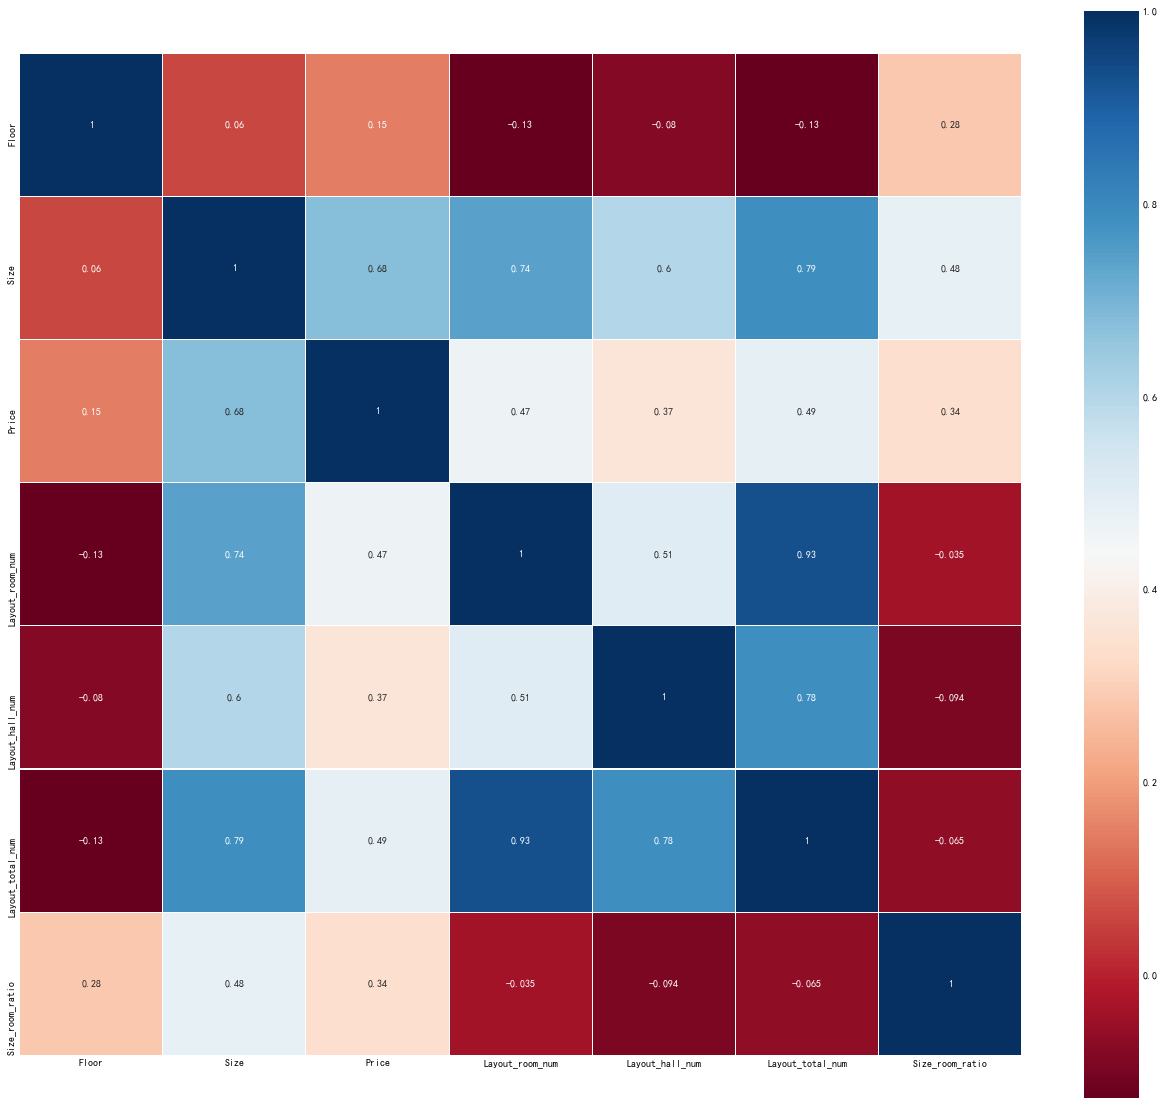

In [137]:
# data_corr 
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

为了方便理解，博主在建模上做了一些精简，模型策略方法如下：

使用Cart决策树的回归模型对二手房房价进行分析预测

使用交叉验证方法充分利用数据集进行训练，避免数据划分不均匀的影响。

使用GridSearchCV方法优化模型参数

使用R2评分方法对模型预测评分

In [139]:
print(df.head(5))

   Region District  Floor                Year   Size Elevator Direction  \
3      东城       东单    6.0  (1949.999, 1990.0]   60.0      无电梯        南北   
5      东城      崇文门   16.0    (1990.0, 1997.0]  210.0      有电梯        南西   
9      东城      陶然亭   19.0    (2007.0, 2010.0]   90.0      有电梯         南   
11     东城      广渠门   18.0    (2000.0, 2003.0]  111.0      有电梯        南北   
13     东城      西罗园    6.0    (1990.0, 1997.0]   42.0      无电梯         南   

   Renovation   Price  Layout_room_num  Layout_hall_num  Layout_total_num  \
3          精装   705.0                2                1                 3   
5          其他  1400.0                3                1                 4   
9          精装   998.0                2                2                 4   
11         其他  1180.0                2                1                 3   
13         其他   319.0                1                1                 2   

    Size_room_ratio  
3              20.0  
5              52.5  
9              22.5 

In [140]:
# 转换训练测试集格式为数组
features = np.array(features)
prices = np.array(prices)
# 导入sklearn进行训练测试集划分
from sklearn.model_selection import train_test_split
features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.2, random_state=0)

NameError: name 'features' is not defined

In [ ]:
 1from sklearn.model_selection import KFold
 2from sklearn.tree import DecisionTreeRegressor
 3from sklearn.metrics import make_scorer
 4from sklearn.model_selection import GridSearchCV
 5
 6# 利用GridSearchCV计算最优解
 7def fit_model(X, y):
 8    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
 9
10    cross_validator = KFold(10, shuffle=True)
11    regressor = DecisionTreeRegressor()
12
13    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
14    scoring_fnc = make_scorer(performance_metric)
15    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)
16
17    # 基于输入数据 [X,y]，进行网格搜索
18    grid = grid.fit(X, y)
19#     print pd.DataFrame(grid.cv_results_)
20    return grid.best_estimator_
21
22# 计算R2分数
23def performance_metric(y_true, y_predict):
24    """计算并返回预测值相比于预测值的分数"""
25    from sklearn.metrics import r2_score
26    score = r2_score(y_true, y_predict)
27
28    return score

In [ ]:
调参优化模型
 1import visuals as vs
 2
 3# 分析模型
 4vs.ModelLearning(features_train, prices_train)
 5vs.ModelComplexity(features_train, prices_train)
 6
 7optimal_reg1 = fit_model(features_train, prices_train)
 8
 9# 输出最优模型的 'max_depth' 参数
10print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg1.get_params()['max_depth']))
11
12predicted_value = optimal_reg1.predict(features_test)
13r2 = performance_metric(prices_test, predicted_value)
14
15print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))